In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 데이터 불러오기 및 결측치 확인

In [2]:
train = pd.read_excel('./2020 빅콘테스트 데이터분석분야-챔피언리그_2019년 실적데이터.xlsx',header = 1,parse_dates=['방송일시'])
test = pd.read_excel('./2020 빅콘테스트 데이터분석분야-챔피언리그_2020년 6월 판매실적예측데이터(평가데이터).xlsx',header = 1,parse_dates=['방송일시'])

In [291]:
train.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0


In [292]:
test.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2020-06-01 06:20:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
1,2020-06-01 06:40:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
2,2020-06-01 07:00:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
3,2020-06-01 07:20:00,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN
4,2020-06-01 07:40:00,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN


In [293]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38309 entries, 0 to 38308
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    38309 non-null  datetime64[ns]
 1   노출(분)   21525 non-null  float64       
 2   마더코드    38309 non-null  int64         
 3   상품코드    38309 non-null  int64         
 4   상품명     38309 non-null  object        
 5   상품군     38309 non-null  object        
 6   판매단가    38309 non-null  int64         
 7   취급액     37372 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.3+ MB


In [294]:
train.isnull().sum()

방송일시         0
노출(분)    16784
마더코드         0
상품코드         0
상품명          0
상품군          0
판매단가         0
취급액        937
dtype: int64

In [295]:
test.isnull().sum()

방송일시        0
노출(분)    1111
마더코드        0
상품코드        0
상품명         0
상품군         0
판매단가        0
취급액      2891
dtype: int64

In [296]:
train.nunique()

방송일시     21525
노출(분)      103
마더코드       716
상품코드      2124
상품명       1770
상품군         12
판매단가       391
취급액      24140
dtype: int64

### 취급액 50,000 -> 0으로 / 노출(분) 전처리

In [3]:
(train['취급액'] == 50000).sum()

1993

In [4]:
train.loc[train['취급액']==50000,'취급액'] = 0
test['취급액'] = test['취급액'].fillna(0)

train['노출(분)'] = train['노출(분)'].fillna(method='pad')
test['노출(분)'] = test['노출(분)'].fillna(method='pad')

### 판매단가 '0' 제거

In [5]:
(train['판매단가'] == 0).sum()
(test['판매단가'] == 0).sum()

175

In [6]:
train = train[train.판매단가 != 0]
test = test[test.판매단가 != 0]

In [7]:
train.isnull().sum()

방송일시     0
노출(분)    0
마더코드     0
상품코드     0
상품명      0
상품군      0
판매단가     0
취급액      0
dtype: int64

In [302]:
test.isnull().sum()

방송일시     0
노출(분)    0
마더코드     0
상품코드     0
상품명      0
상품군      0
판매단가     0
취급액      0
dtype: int64

In [15]:
print('train shape:', train.shape, '  ', 'test shape: ', test.shape)

train shape: (37372, 8)    test shape:  (2716, 8)


### 시간 변수 / 요일 / 계절(month)

In [8]:
for df in (train, test):
    df['month'] = df['방송일시'].dt.month
    df['weekday'] = df['방송일시'].dt.weekday
    df['hour'] = df['방송일시'].dt.hour
    df['minute'] = df['방송일시'].dt.minute
    df['date'] = df['방송일시'].dt.date

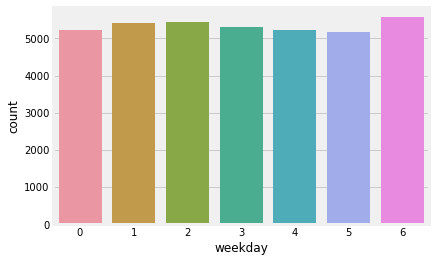

In [28]:
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = 'C:/Windows/Fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

sns.countplot(train['weekday'])

In [417]:
train.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,month,weekday,hour,minute,date
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,1,1,6,0,2019-01-01
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,1,1,6,0,2019-01-01
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,1,1,6,20,2019-01-01
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,1,1,6,20,2019-01-01
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,1,1,6,40,2019-01-01


In [9]:
train = pd.get_dummies(train, columns=['weekday'], drop_first=False)

In [10]:
test = pd.get_dummies(test, columns=['weekday'], drop_first=False)

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37372 entries, 0 to 38303
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   방송일시       37372 non-null  datetime64[ns]
 1   노출(분)      37372 non-null  float64       
 2   마더코드       37372 non-null  int64         
 3   상품코드       37372 non-null  int64         
 4   상품명        37372 non-null  object        
 5   상품군        37372 non-null  object        
 6   판매단가       37372 non-null  int64         
 7   취급액        37372 non-null  float64       
 8   month      37372 non-null  int64         
 9   hour       37372 non-null  int64         
 10  minute     37372 non-null  int64         
 11  date       37372 non-null  object        
 12  weekday_0  37372 non-null  uint8         
 13  weekday_1  37372 non-null  uint8         
 14  weekday_2  37372 non-null  uint8         
 15  weekday_3  37372 non-null  uint8         
 16  weekday_4  37372 non-null  uint8        

### 휴일 변수

In [11]:
from datetime import date
for df in (train, test) :
    df['holiday'] = (1*(df['방송일시'].dt.date.values == date(2019, 1, 1)) | 1*(df['방송일시'].dt.date.values == date(2020, 1, 1)) 
                     | 1*(df['방송일시'].dt.date.values == date(2019, 2, 4)) | 1*(df['방송일시'].dt.date.values == date(2019, 2, 5))
                    | 1*(df['방송일시'].dt.date.values == date(2019, 2, 6)) | 1*(df['방송일시'].dt.date.values == date(2019, 3, 1))
                    | 1*(df['방송일시'].dt.date.values == date(2019, 5, 5)) | 1*(df['방송일시'].dt.date.values == date(2019, 5, 6))
                    | 1*(df['방송일시'].dt.date.values == date(2019, 5, 12)) | 1*(df['방송일시'].dt.date.values == date(2019, 6, 6))
                    | 1*(df['방송일시'].dt.date.values == date(2019, 8, 15)) | 1*(df['방송일시'].dt.date.values == date(2019, 9, 12))
                    | 1*(df['방송일시'].dt.date.values == date(2019, 9, 13)) | 1*(df['방송일시'].dt.date.values == date(2019, 9, 14))
                    | 1*(df['방송일시'].dt.date.values == date(2019, 10, 3)) | 1*(df['방송일시'].dt.date.values == date(2019, 10, 9))
                    | 1*(df['방송일시'].dt.date.values == date(2019, 12, 25)) | 1*(df['방송일시'].dt.date.values == date(2020, 6, 6)))

In [309]:
train.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,month,hour,minute,date,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,holiday
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,1,6,0,2019-01-01,1,0,0,0,0,0,1
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,1,6,0,2019-01-01,1,0,0,0,0,0,1
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,1,6,20,2019-01-01,1,0,0,0,0,0,1
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,1,6,20,2019-01-01,1,0,0,0,0,0,1
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,1,6,40,2019-01-01,1,0,0,0,0,0,1


### 일시불 / 무이자 / 해당X 구분변수

In [157]:
#for df in (train,test):
#    df['일시불'] = 1*(df['상품명'].startswith('일시불') == 'True')
for df in train['상품명']:    
    if 일시불 in df:
        print(True)

TypeError: 'in <string>' requires string as left operand, not list

In [134]:
train.head(100)

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,month,minute,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,holiday,일시불
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,1,0,1,0,0,0,0,0,1,0
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,1,0,1,0,0,0,0,0,1,0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,1,20,1,0,0,0,0,0,1,0
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,1,20,1,0,0,0,0,0,1,0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,1,40,1,0,0,0,0,0,1,0
5,2019-01-01 06:40:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,9337000.0,1,40,1,0,0,0,0,0,1,0
6,2019-01-01 07:00:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,6819000.0,1,0,1,0,0,0,0,0,1,0
7,2019-01-01 07:20:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,15689000.0,1,20,1,0,0,0,0,0,1,0
8,2019-01-01 07:40:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,25370000.0,1,40,1,0,0,0,0,0,1,0
9,2019-01-01 08:00:00,20.0,100808,202377,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,의류,59900,16133000.0,1,0,1,0,0,0,0,0,1,0


### 주문량 계산 및 변수추가

In [12]:
train['취급액'] = train['취급액'].astype(int)

In [13]:
a = np.array(train['취급액']/train['판매단가'])

In [14]:
train['주문량'] = pd.DataFrame(np.ceil(a))

In [16]:
print(train.shape)

(37372, 21)


In [15]:
train.isnull().sum()

방송일시           0
노출(분)          0
마더코드           0
상품코드           0
상품명            0
상품군            0
판매단가           0
취급액            0
month          0
hour           0
minute         0
date           0
weekday_0      0
weekday_1      0
weekday_2      0
weekday_3      0
weekday_4      0
weekday_5      0
weekday_6      0
holiday        0
주문량          874
dtype: int64

### 상품군 전처리

In [33]:
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = 'C:/Windows/Fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

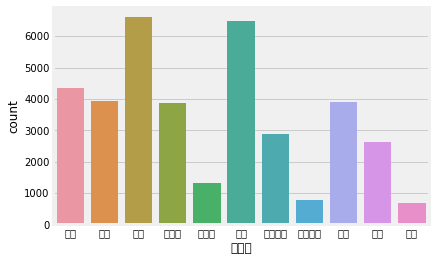

In [34]:
sns.countplot(train['상품군'])

In [35]:
product_mapping = {'가구':0, '가전':1, '건강기능':2, '농수축':3, '생활용품':4, '속옷':5,
                   '의류':6, '이미용':7, '잡화':8, '주방':9, '침구':10}
for dataset in (train, test):
    dataset['상품군'] = dataset['상품군'].map(product_mapping)

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37372 entries, 0 to 38303
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   방송일시       37372 non-null  datetime64[ns]
 1   노출(분)      37372 non-null  float64       
 2   마더코드       37372 non-null  int64         
 3   상품코드       37372 non-null  int64         
 4   상품명        37372 non-null  object        
 5   상품군        37372 non-null  int64         
 6   판매단가       37372 non-null  int64         
 7   취급액        37372 non-null  float64       
 8   month      37372 non-null  int64         
 9   hour       37372 non-null  int64         
 10  minute     37372 non-null  int64         
 11  date       37372 non-null  object        
 12  weekday_0  37372 non-null  uint8         
 13  weekday_1  37372 non-null  uint8         
 14  weekday_2  37372 non-null  uint8         
 15  weekday_3  37372 non-null  uint8         
 16  weekday_4  37372 non-null  uint8        

### 날씨 변수(서울) 추가

In [36]:
weather = pd.read_excel('./서울날씨(2019).xlsx', parse_dates = ['일시'])

In [37]:
weather['강수량(mm)'] = weather['강수량(mm)'].fillna(0)
weather['적설(cm)'] = weather['적설(cm)'].fillna(0)
weather['풍속(m/s)'] = weather['풍속(m/s)'].fillna(0)
weather['전운량(10분위)'] = weather['전운량(10분위)'].fillna(0)

In [39]:
weather.head()

,일시,기온(°C),강수량(mm),풍속(m/s),적설(cm),전운량(10분위)
0,2019-01-01 00:00:00,-5.5,0.0,1.0,0.0,0.0
1,2019-01-01 01:00:00,-5.9,0.0,1.8,0.0,0.0
2,2019-01-01 02:00:00,-6.5,0.0,1.2,0.0,0.0
3,2019-01-01 03:00:00,-6.9,0.0,2.2,0.0,1.0
4,2019-01-01 04:00:00,-7.2,0.0,1.2,0.0,3.0


In [40]:
weather['hour'] = weather['일시'].dt.hour
weather['date'] = weather['일시'].dt.date

In [41]:
train = pd.merge(train, weather, on = ['date', 'hour'], how = 'left')

In [42]:
train.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,month,hour,...,weekday_4,weekday_5,weekday_6,holiday,일시,기온(°C),강수량(mm),풍속(m/s),적설(cm),전운량(10분위)
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,6,39900,2099000.0,1,6,...,0,0,0,1,2019-01-01 06:00:00,-7.9,0.0,1.3,0.0,4.0
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,6,39900,4371000.0,1,6,...,0,0,0,1,2019-01-01 06:00:00,-7.9,0.0,1.3,0.0,4.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,6,39900,3262000.0,1,6,...,0,0,0,1,2019-01-01 06:00:00,-7.9,0.0,1.3,0.0,4.0
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,6,39900,6955000.0,1,6,...,0,0,0,1,2019-01-01 06:00:00,-7.9,0.0,1.3,0.0,4.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,6,39900,6672000.0,1,6,...,0,0,0,1,2019-01-01 06:00:00,-7.9,0.0,1.3,0.0,4.0


### 카테고리 분류

### 마더코드/상품코드/상품명/방송일시/일시 제거

In [51]:
train = train.drop(['마더코드','상품코드','상품명','방송일시','일시','date'], axis = 1)

In [431]:
#train = train.drop(['노출(분)','minute'], axis = 1)

In [43]:
train['취급액_log'] = np.log(train['취급액'].values)

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37372 entries, 0 to 37371
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   노출(분)      37372 non-null  float64
 1   상품군        37372 non-null  int64  
 2   판매단가       37372 non-null  int64  
 3   취급액        37372 non-null  float64
 4   month      37372 non-null  int64  
 5   hour       37372 non-null  int64  
 6   minute     37372 non-null  int64  
 7   weekday_0  37372 non-null  uint8  
 8   weekday_1  37372 non-null  uint8  
 9   weekday_2  37372 non-null  uint8  
 10  weekday_3  37372 non-null  uint8  
 11  weekday_4  37372 non-null  uint8  
 12  weekday_5  37372 non-null  uint8  
 13  weekday_6  37372 non-null  uint8  
 14  holiday    37372 non-null  int32  
 15  기온(°C)     37372 non-null  float64
 16  강수량(mm)    37372 non-null  float64
 17  풍속(m/s)    37372 non-null  float64
 18  적설(cm)     37372 non-null  float64
 19  전운량(10분위)  37372 non-null  float64
 20  취급액_lo

In [53]:
train_x = train.drop(['취급액','취급액_log'],axis=1)

In [54]:
train_y = train['취급액_log']

### 정규화

In [79]:
traina = train.drop(['취급액_log'],axis=1)

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(traina)
scaled_train_data = scaler.transform(traina)

In [81]:
scale_cols = ['상품군','판매단가','취급액','month','hour','weekday_0','weekday_1','weekday_2',
              'weekday_3','weekday_4','weekday_5','weekday_6','holiday','기온(°C)','강수량(mm)',
             '풍속(m/s)','적설(cm)','전운량(10분위)','노출(분)','minute']

In [82]:
df_scaled = pd.DataFrame(scaled_train_data)
df_scaled.columns = scale_cols

In [83]:
df_scaled.head()

,상품군,판매단가,취급액,month,hour,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,holiday,기온(°C),강수량(mm),풍속(m/s),적설(cm),전운량(10분위),노출(분),minute
0,0.46714,0.6,0.003423,0.006518,0.0,0.26087,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.061053,0.0,0.142857,0.0,0.4
1,0.46714,0.6,0.003423,0.013574,0.0,0.26087,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.061053,0.0,0.142857,0.0,0.4
2,0.46714,0.6,0.003423,0.010130,0.0,0.26087,0.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.061053,0.0,0.142857,0.0,0.4
3,0.46714,0.6,0.003423,0.021599,0.0,0.26087,0.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.061053,0.0,0.142857,0.0,0.4
4,0.46714,0.6,0.003423,0.020720,0.0,0.26087,0.8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.061053,0.0,0.142857,0.0,0.4


### 카테고리형 변환

In [331]:
train['상품군'] = train['상품군'].astype('category')

### 분포 확인

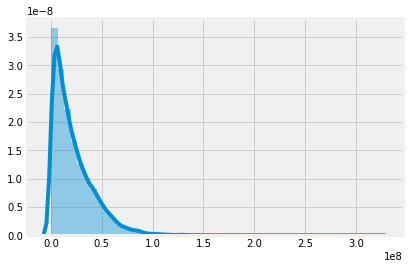

In [40]:
sns.distplot(train.취급액.values)

### 모델링

### 1. LSTM

In [84]:
TEST_SIZE = 3000
WINDOW_SIZE = 3

In [85]:
train = df_scaled[:-TEST_SIZE]

In [86]:
test = df_scaled[-TEST_SIZE:]

In [87]:
def make_dataset(data, label, window_size = 7):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [89]:
feature_cols = ['상품군','판매단가','month','hour','weekday_0','weekday_1','weekday_1','weekday_2',
              'weekday_3','weekday_4','weekday_5','weekday_6','holiday','기온(°C)','강수량(mm)',
             '풍속(m/s)','적설(cm)','전운량(10분위)']
label_cols = ['취급액']

In [90]:
train_feature = train[feature_cols]
train_label = train[label_cols]

In [91]:
train_feature, train_label = make_dataset(train_feature, train_label, 7)

In [92]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature,train_label,test_size=0.1,shuffle=False)

In [93]:
x_train.shape, x_valid.shape

((30928, 7, 18), (3437, 7, 18))

In [94]:
test_feature = test[feature_cols]
test_label = test[label_cols]

In [95]:
test_feature.shape, test_label.shape

((3000, 18), (3000, 1))

In [96]:
test_feature, test_label = make_dataset(test_feature, test_label, 7)

In [97]:
test_feature.shape, test_label.shape

((2993, 7, 18), (2993, 1))

In [98]:
train_feature.shape[1], train_feature.shape[0]

(7, 34365)

In [99]:
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
#import plotly.plotly as py
#import plotly.graph_objs as go
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)

# Set seeds to make the experiment more reproducible.
#from tensorflow import set_random_seed
from numpy.random import seed
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import os

In [100]:
model = Sequential()
model.add(LSTM(50, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
#model.add(LSTM(50,return_sequences=False))
# model.add(LSTM(16, return_sequences=False))
# model.add(Dense(16, activation='linear'))
#model.add(Dropout(0.5))
model.add(Dense(1))

In [101]:
model_path = './LSTM/'

In [102]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

history = model.fit(x_train, y_train, 
                                    epochs=100, 
                                    batch_size=7, #test,vali,train과 모두 나누어 떨어지도록
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/100
4416/4419 [============================>.] - ETA: 0s - loss: 0.0055
Epoch 00001: val_loss improved from inf to 0.00351, saving model to ./LSTM/tmp_checkpoint.h5
4419/4419 [==============================] - 9s 2ms/step - loss: 0.0055 - val_loss: 0.0035
Epoch 2/100
4405/4419 [============================>.] - ETA: 0s - loss: 0.0041
Epoch 00002: val_loss improved from 0.00351 to 0.00289, saving model to ./LSTM/tmp_checkpoint.h5
4419/4419 [==============================] - 9s 2ms/step - loss: 0.0041 - val_loss: 0.0029
Epoch 3/100
4408/4419 [============================>.] - ETA: 0s - loss: 0.0035
Epoch 00003: val_loss improved from 0.00289 to 0.00255, saving model to ./LSTM/tmp_checkpoint.h5
4419/4419 [==============================] - 9s 2ms/step - loss: 0.0035 - val_loss: 0.0026
Epoch 4/100
4412/4419 [============================>.] - ETA: 0s - loss: 0.0033
Epoch 00004: val_loss did not improve from 0.00255
4419/4419 [==============================] - 9s 2ms/step - loss: 0.00

In [103]:
model.load_weights(filename)

In [104]:
pred = model.predict(test_feature)

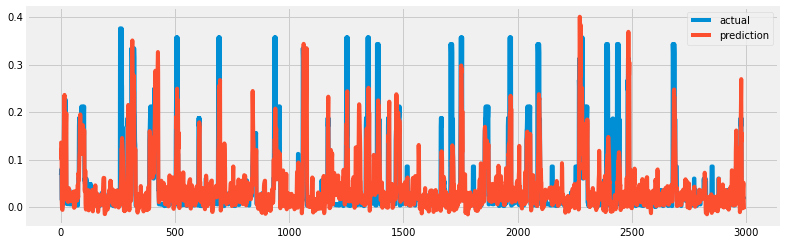

In [105]:
plt.figure(figsize=(12, 4))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

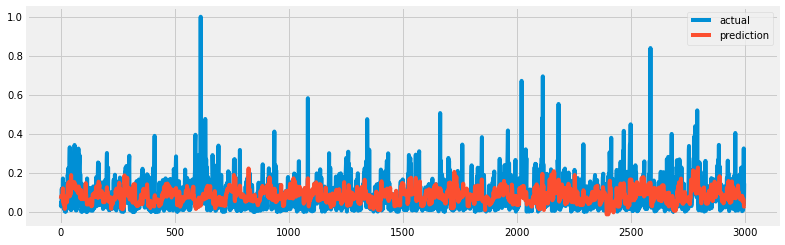

In [469]:
plt.figure(figsize=(12, 4))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [ ]:
# actual data에서 갑자기 매출액이 뛰는 부분을 잘 파악하여 변수 설정

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(np.array(real), pred)

### xgb gbm

In [59]:
TEST_SIZE = 3000
WINDOW_SIZE = 3

In [60]:
train_x = df_scaled[:-TEST_SIZE]

In [61]:
train_y = train_y[:-TEST_SIZE]

In [62]:
test_x = df_scaled[-TEST_SIZE:]

In [63]:
test_y = train_y[-TEST_SIZE:]

In [64]:
real = train['취급액'][-TEST_SIZE:]

In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_log_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression

In [66]:
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, shuffle=False)

In [67]:
import lightgbm as lgbm

In [68]:
lgb_params = {
    'metric' : 'rmse',
    'learning_rate': 0.1,
    'max_depth': 25,
    'num_leaves': 1000, 
    'objective': 'regression',
    'feature_fraction': 0.9,
    'bagging_fraction': 0.5,
    'max_bin': 1000 }

In [69]:
lgb_df = lgbm.Dataset(train_x,train_y)

In [71]:
# -*- coding: utf-8 -*- 
lgb_model = lgbm.train(lgb_params, lgb_df, num_boost_round=1500)

In [72]:
pred = lgb_model.predict(test_x)

In [73]:
pred_lgb = np.exp(pred)

In [74]:
pred_lgb

array([ 0., inf,  0., ...,  0.,  0.,  0.])

In [500]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(np.array(real), pred)

inf

In [501]:
import xgboost as xgb

In [502]:
params = {
    'booster':            'gbtree',
    'objective':          'reg:linear',
    'learning_rate':      0.1,
    'max_depth':          14,
    'subsample':          0.8,
    'colsample_bytree':   0.7,
    'colsample_bylevel':  0.7,
    'silent':             1
}

In [503]:
dtrain = xgb.DMatrix(train, target)

In [504]:
gbm = xgb.train(params,
                dtrain,
                num_boost_round = 200)

[07:01:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[07:01:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:01:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [507]:
pred_xgb = gbm.predict(xgb.DMatrix(test))

In [508]:
pred_xgb

array([0.1467413 , 0.13143015, 0.11021188, ..., 0.08914071, 0.07770124,
       0.05347568], dtype=float32)

In [509]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(np.array(real), pred_xgb)

inf